In [ ]:
#EDA
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

EDA for time series

In [ ]:
dataf = pd.read_csv('raw_data.csv')#, index_col = 'Date', parse_dates=True)
dataf['Date'] = pd.to_datetime(dataf['Date'], dayfirst=True)

In [ ]:
dataf

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26,41,37,24,264,272,270,273,311,309,353,305,107,422,1367,632
1,2009-01-08,28,41,31,22,263,270,271,272,310,313,318,304,632,632,947,632
2,2009-01-15,29,36,27,22,265,272,271,269,311,310,309,305,737,737,947,1157
3,2009-01-22,28,35,28,25,266,274,271,270,312,311,308,309,317,737,737,1157
4,2009-01-29,26,31,25,28,267,269,270,271,309,309,304,311,947,842,1367,1157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41,33,21,47,274,272,269,271,311,304,302,310,737,1262,1682,737
308,2014-11-27,40,27,24,45,271,272,268,267,310,304,303,307,737,842,1577,527
309,2014-12-04,38,26,28,45,269,270,265,267,307,304,303,307,842,1052,1367,842
310,2014-12-11,32,26,32,49,272,273,266,264,302,305,303,307,842,1052,1472,737


OUTLIER DETECTION

In [ ]:
df_no_outlier = pd.DataFrame(dataf)

In [ ]:
products = ['r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
for i in products:
  Q1 = dataf[i].quantile(0.25)
  Q3 = dataf[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  df_no_outlier[i] = dataf[i][(dataf[i]>lower_limit)&(dataf[i]<upper_limit)]

In [ ]:
df_no_outlier

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26.0,41,37,24,264.0,272,270.0,273,311.0,309.0,NaN,305.0,107,422.0,1367.0,632.0
1,2009-01-08,28.0,41,31,22,263.0,270,271.0,272,310.0,313.0,318.0,304.0,632,632.0,947.0,632.0
2,2009-01-15,29.0,36,27,22,265.0,272,271.0,269,311.0,310.0,309.0,305.0,737,737.0,947.0,1157.0
3,2009-01-22,28.0,35,28,25,266.0,274,271.0,270,312.0,311.0,308.0,309.0,317,737.0,737.0,1157.0
4,2009-01-29,26.0,31,25,28,267.0,269,270.0,271,309.0,309.0,304.0,311.0,947,842.0,1367.0,1157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41.0,33,21,47,274.0,272,269.0,271,311.0,304.0,302.0,310.0,737,1262.0,1682.0,737.0
308,2014-11-27,40.0,27,24,45,271.0,272,268.0,267,310.0,304.0,303.0,307.0,737,842.0,1577.0,527.0
309,2014-12-04,38.0,26,28,45,269.0,270,265.0,267,307.0,304.0,303.0,307.0,842,1052.0,1367.0,842.0
310,2014-12-11,32.0,26,32,49,272.0,273,266.0,264,302.0,305.0,303.0,307.0,842,1052.0,1472.0,737.0


ADJUSTMENT FOR OUTLIER MISSING VALUES

In [ ]:
x = df_no_outlier.iloc[:, :].values

In [ ]:
x[0][11]

nan

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,1:])   #3 because last index is excuded
x[:,1:] = imputer.transform(x[:,1:])

In [ ]:
products = ['Date', 'r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
df_clean = pd.DataFrame(x,columns=products)

FINAL DATASET

In [ ]:
df_clean

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26,41,37,24,264,272,270,273,311,309,311.01,305,107,422,1367,632
1,2009-01-08,28,41,31,22,263,270,271,272,310,313,318,304,632,632,947,632
2,2009-01-15,29,36,27,22,265,272,271,269,311,310,309,305,737,737,947,1157
3,2009-01-22,28,35,28,25,266,274,271,270,312,311,308,309,317,737,737,1157
4,2009-01-29,26,31,25,28,267,269,270,271,309,309,304,311,947,842,1367,1157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41,33,21,47,274,272,269,271,311,304,302,310,737,1262,1682,737
308,2014-11-27,40,27,24,45,271,272,268,267,310,304,303,307,737,842,1577,527
309,2014-12-04,38,26,28,45,269,270,265,267,307,304,303,307,842,1052,1367,842
310,2014-12-11,32,26,32,49,272,273,266,264,302,305,303,307,842,1052,1472,737


In [ ]:
products = ['r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
for i in products:
  df_clean[i] = pd.to_numeric(df_clean[i])

In [ ]:
df_clean.dtypes

Date    datetime64[ns]
r1mw           float64
r2mw           float64
r3mw           float64
r4mw           float64
r1m            float64
r2m            float64
r3m            float64
r4m            float64
r1c            float64
r2c            float64
r3c            float64
r4c            float64
r1a            float64
r2a            float64
r3a            float64
r4a            float64
dtype: object

ML ALGORITHMS

DATA PREPROCESS

In [ ]:
df_clean['r1mw-1']=df_clean['r1mw'].shift(+1)
df_clean['r2mw-1']=df_clean['r2mw'].shift(+1)
df_clean['r3mw-1']=df_clean['r3mw'].shift(+1)
df_clean['r4mw-1']=df_clean['r4mw'].shift(+1)
df_clean['r1m-1']=df_clean['r1m'].shift(+1)
df_clean['r2m-1']=df_clean['r2m'].shift(+1)
df_clean['r3m-1']=df_clean['r3m'].shift(+1)
df_clean['r4m-1']=df_clean['r4m'].shift(+1)
df_clean['r1c-1']=df_clean['r1c'].shift(+1)
df_clean['r2c-1']=df_clean['r2c'].shift(+1)
df_clean['r3c-1']=df_clean['r3c'].shift(+1)
df_clean['r4c-1']=df_clean['r4c'].shift(+1)
df_clean['r1a-1']=df_clean['r1a'].shift(+1)
df_clean['r2a-1']=df_clean['r2a'].shift(+1)
df_clean['r3a-1']=df_clean['r3a'].shift(+1)
df_clean['r4a-1']=df_clean['r4a'].shift(+1)

df_clean['r1mw-2']=df_clean['r1mw'].shift(+2)
df_clean['r2mw-2']=df_clean['r2mw'].shift(+2)
df_clean['r3mw-2']=df_clean['r3mw'].shift(+2)
df_clean['r4mw-2']=df_clean['r4mw'].shift(+2)
df_clean['r1m-2']=df_clean['r1m'].shift(+2)
df_clean['r2m-2']=df_clean['r2m'].shift(+2)
df_clean['r3m-2']=df_clean['r3m'].shift(+2)
df_clean['r4m-2']=df_clean['r4m'].shift(+2)
df_clean['r1c-2']=df_clean['r1c'].shift(+2)
df_clean['r2c-2']=df_clean['r2c'].shift(+2)
df_clean['r3c-2']=df_clean['r3c'].shift(+2)
df_clean['r4c-2']=df_clean['r4c'].shift(+2)
df_clean['r1a-2']=df_clean['r1a'].shift(+2)
df_clean['r2a-2']=df_clean['r2a'].shift(+2)
df_clean['r3a-2']=df_clean['r3a'].shift(+2)
df_clean['r4a-2']=df_clean['r4a'].shift(+2)

df_clean['r1mw-3']=df_clean['r1mw'].shift(+3)
df_clean['r2mw-3']=df_clean['r2mw'].shift(+3)
df_clean['r3mw-3']=df_clean['r3mw'].shift(+3)
df_clean['r4mw-3']=df_clean['r4mw'].shift(+3)
df_clean['r1m-3']=df_clean['r1m'].shift(+3)
df_clean['r2m-3']=df_clean['r2m'].shift(+3)
df_clean['r3m-3']=df_clean['r3m'].shift(+3)
df_clean['r4m-3']=df_clean['r4m'].shift(+3)
df_clean['r1c-3']=df_clean['r1c'].shift(+3)
df_clean['r2c-3']=df_clean['r2c'].shift(+3)
df_clean['r3c-3']=df_clean['r3c'].shift(+3)
df_clean['r4c-3']=df_clean['r4c'].shift(+3)
df_clean['r1a-3']=df_clean['r1a'].shift(+3)
df_clean['r2a-3']=df_clean['r2a'].shift(+3)
df_clean['r3a-3']=df_clean['r3a'].shift(+3)
df_clean['r4a-3']=df_clean['r4a'].shift(+3)

df_clean['r1mw-4']=df_clean['r1mw'].shift(+4)
df_clean['r2mw-4']=df_clean['r2mw'].shift(+4)
df_clean['r3mw-4']=df_clean['r3mw'].shift(+4)
df_clean['r4mw-4']=df_clean['r4mw'].shift(+4)
df_clean['r1m-4']=df_clean['r1m'].shift(+4)
df_clean['r2m-4']=df_clean['r2m'].shift(+4)
df_clean['r3m-4']=df_clean['r3m'].shift(+4)
df_clean['r4m-4']=df_clean['r4m'].shift(+4)
df_clean['r1c-4']=df_clean['r1c'].shift(+4)
df_clean['r2c-4']=df_clean['r2c'].shift(+4)
df_clean['r3c-4']=df_clean['r3c'].shift(+4)
df_clean['r4c-4']=df_clean['r4c'].shift(+4)
df_clean['r1a-4']=df_clean['r1a'].shift(+4)
df_clean['r2a-4']=df_clean['r2a'].shift(+4)
df_clean['r3a-4']=df_clean['r3a'].shift(+4)
df_clean['r4a-4']=df_clean['r4a'].shift(+4)

In [ ]:
df_clean = df_clean.dropna()

In [ ]:
import numpy as np
x1,x2,x3,y=df_clean['r3m-1'],df_clean['r3m-2'],df_clean['r3m-3'],df_clean['r3m']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[271.         271.         271.        ]
 [270.         271.         271.        ]
 [273.         270.         271.        ]
 [272.         273.         270.        ]
 [270.         272.         273.        ]
 [273.         270.         272.        ]
 [270.         273.         270.        ]
 [268.         270.         273.        ]
 [271.         268.         270.        ]
 [265.         271.         268.        ]
 [265.         265.         271.        ]
 [264.         265.         265.        ]
 [268.         264.         265.        ]
 [267.         268.         264.        ]
 [268.         267.         268.        ]
 [268.         268.         267.        ]
 [269.         268.         268.        ]
 [270.         269.         268.        ]
 [269.         270.         269.        ]
 [270.         269.         270.        ]
 [269.         270.         269.        ]
 [270.         269.         270.        ]
 [271.         270.         269.        ]
 [270.         271.         270.  

In [ ]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

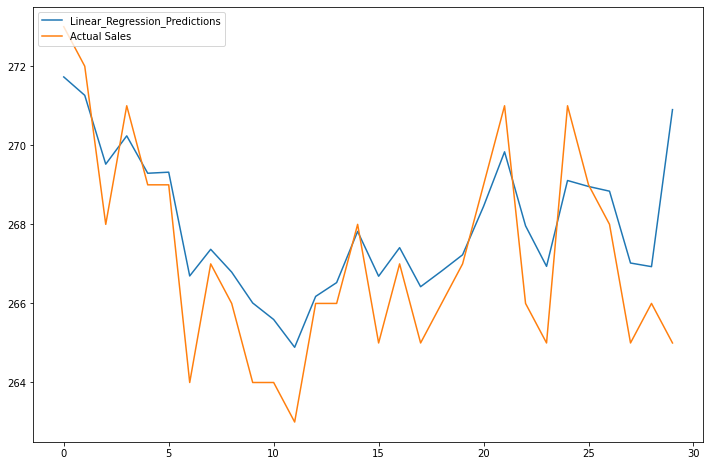

In [ ]:
pred=lin_model.predict(X_test)
pred2 = np.roll(pred,-1)
#####################################################
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred2,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(pred2,y_test))
r2 = r2_score(pred2,y_test)
mp = mape(pred2,y_test)
print("RMSE is: ",rmse)
print("R2 is: ",r2)
print("MAPE is: ",mp)

RMSE is:  1.662032964212315
R2 is:  0.06226893124323141
MAPE is:  0.45936140886314897


RANDOM FOREST REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,max_features=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


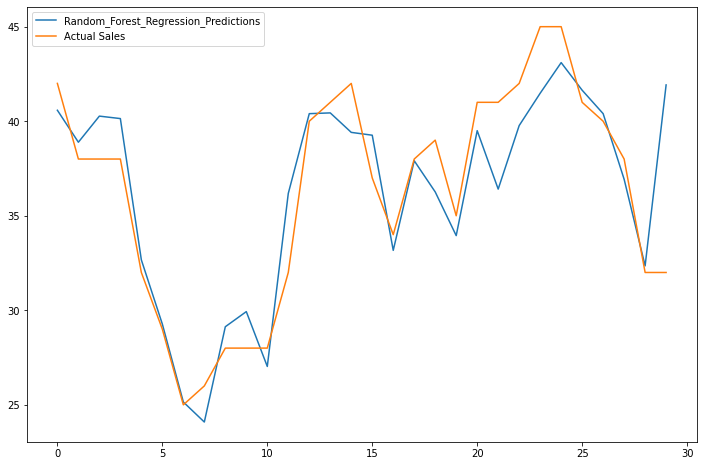

In [ ]:
rf_model.fit(X_train,y_train)
rfpred=rf_model.predict(X_test)
rfpred2 = np.roll(rfpred,-1)
#####################################################
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(rfpred2,label='Random_Forest_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(rfpred2,y_test))
r2 = r2_score(rfpred2,y_test)
print("RMSE is: ",rmse)
print("R2 is: ",r2)

RMSE is:  2.6222555396772953
R2 is:  0.7508637346866426


KERNEL SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x = scx.fit_transform(X_train) #fit will calculate the mean and sd and transform applies the formula
y = scy.fit_transform(y_train) #not just transform since mean and sd of y is reqd.

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

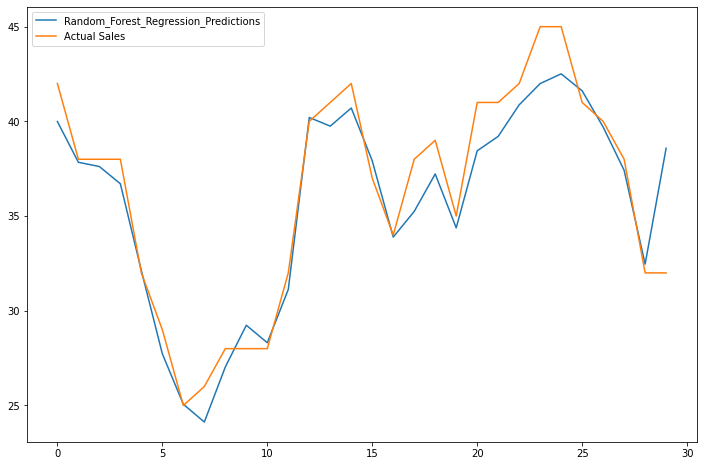

In [ ]:
xt = scx.transform(X_test)
svrp = regressor.predict(xt)
svrpred = scy.inverse_transform(svrp) 
svrpred2 = np.roll(svrpred,-1)
#####################################################
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(svrpred2,label='Random_Forest_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(svrpred2,y_test))
r2 = r2_score(svrpred2,y_test)
print("RMSE is: ",rmse)
print("R2 is: ",r2)

RMSE is:  1.8274450214508744
R2 is:  0.8782799642272862


LOOP

The time series considered is:  r1a


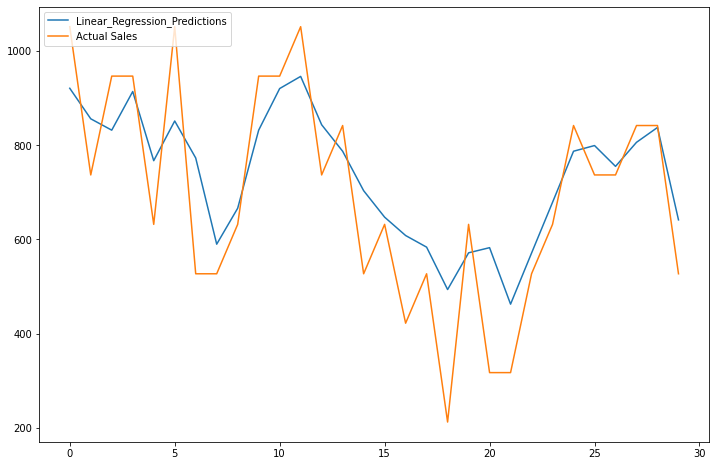

RMSE is:  126.32628057407749
R2 is:  0.09313163548701164
MAPE is:  14.956639467857476


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


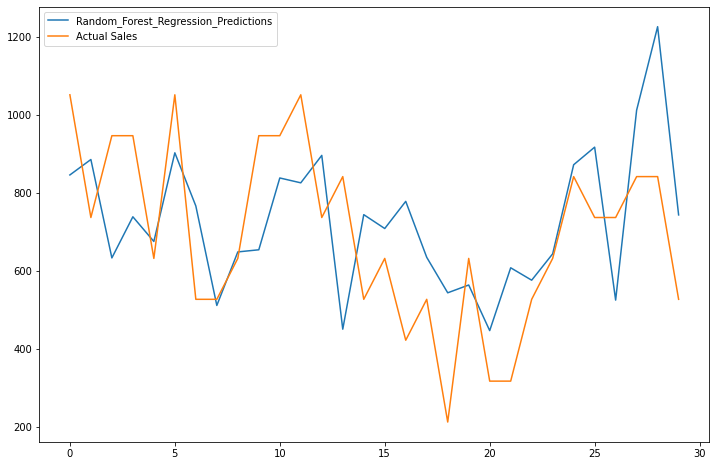

RMSE is:  210.4607793529078
R2 is:  -0.48714019990336377
MAPE is:  32.689205986970265


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


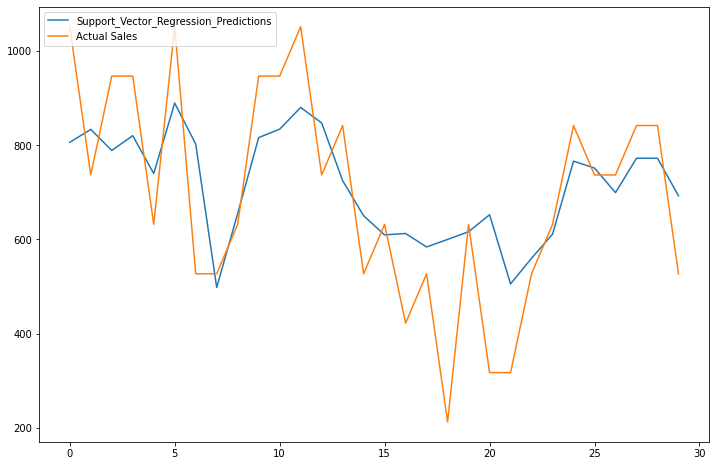

RMSE is:  153.99612638783663
R2 is:  -0.9881924914179183
MAPE is:  29.561347001062916
The time series considered is:  r2a


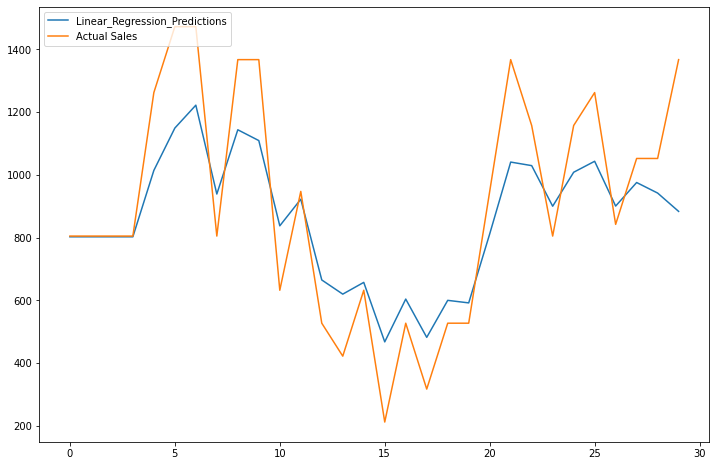

RMSE is:  186.92125383464
R2 is:  0.11649014150043568
MAPE is:  17.575542490207138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


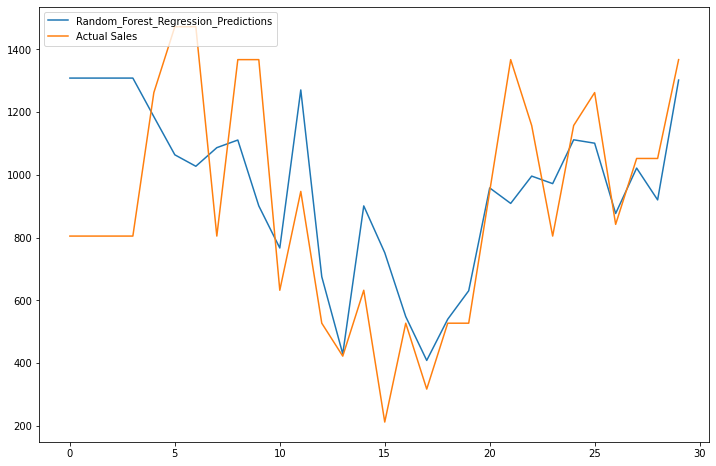

RMSE is:  293.881535969012
R2 is:  -0.25055111786437356
MAPE is:  43.403695711228025


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


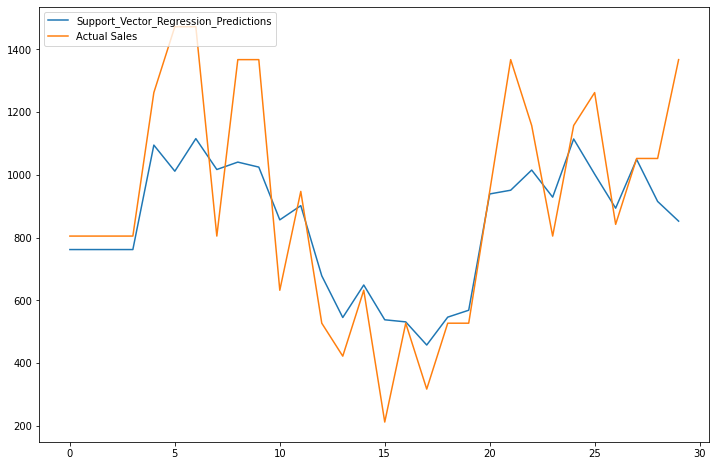

RMSE is:  218.10461656790477
R2 is:  -0.22918246553104415
MAPE is:  44.52769503200866
The time series considered is:  r3a


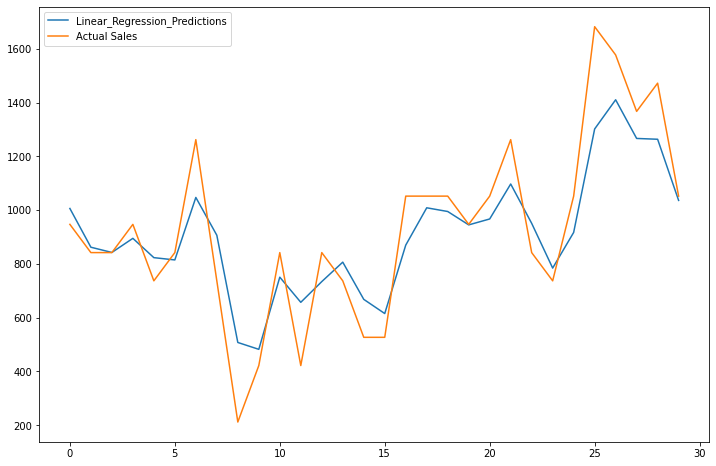

RMSE is:  143.77048586744277
R2 is:  0.5631489225251438
MAPE is:  13.295982033042486


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


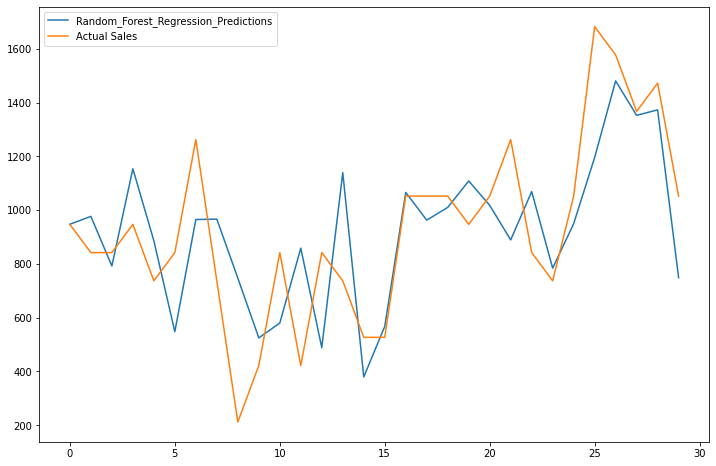

RMSE is:  242.752564440385
R2 is:  0.15996536626354452
MAPE is:  42.50213296511104


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


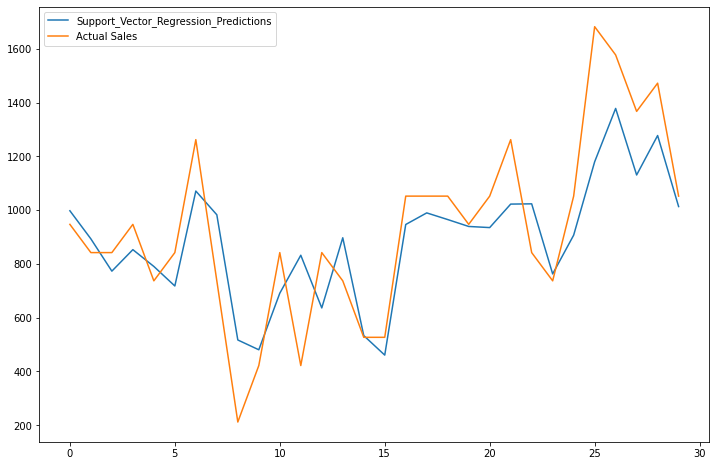

RMSE is:  185.24873390756042
R2 is:  0.2912481168127903
MAPE is:  39.90809731124633
The time series considered is:  r4a


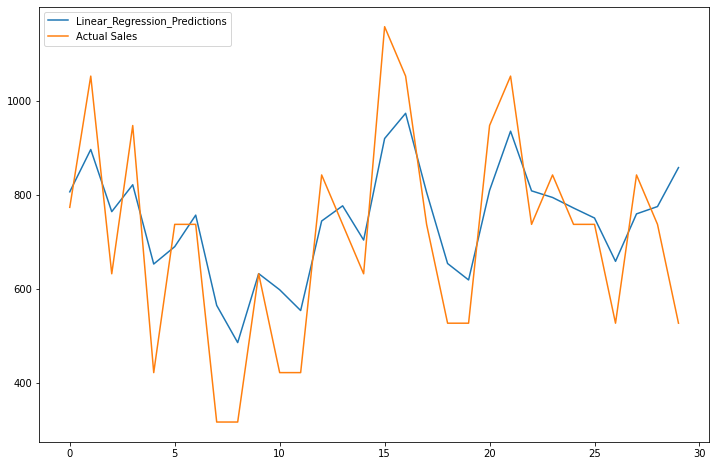

RMSE is:  133.8267795522933
R2 is:  -0.3554237636978774
MAPE is:  15.363162905548538


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


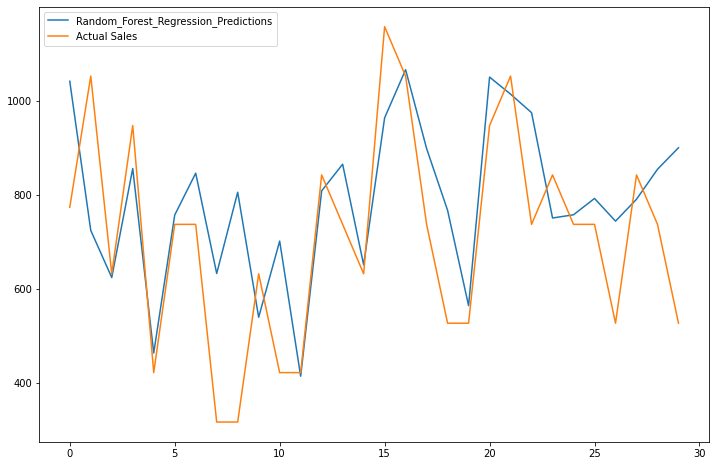

RMSE is:  187.00634167358302
R2 is:  -0.2900232225301862
MAPE is:  30.365783868317823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


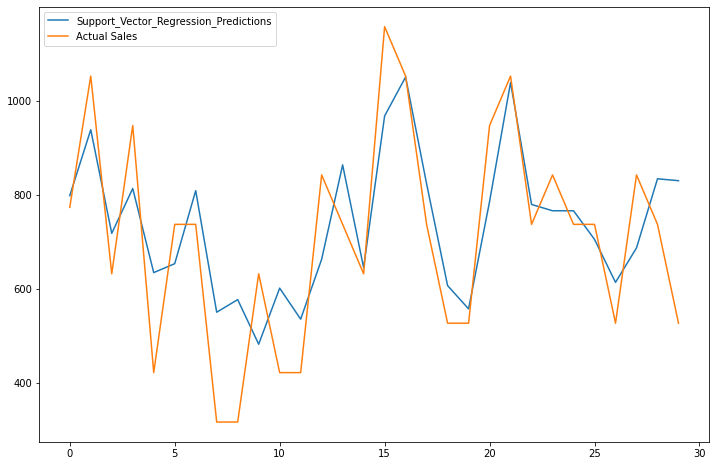

RMSE is:  135.76890697313416
R2 is:  0.1196203925128635
MAPE is:  29.74499564125527


In [ ]:
#"""LOOP FOR 16"""
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

products = ['r1a',	'r2a',	'r3a',	'r4a']
for i in products:
    print("The time series considered is: ",i)
    x1,x2,x3,y=df_clean[i+'-1'],df_clean[i+'-2'],df_clean[i+'-3'],df_clean[i]
    x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
    x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
    final_x=np.concatenate((x1,x2,x3),axis=1)
    #print(final_x)

    X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

#    """LINEAR REGRESSION"""

    from sklearn.linear_model import LinearRegression
    lin_model=LinearRegression()

    lin_model.fit(X_train,y_train)

    pred=lin_model.predict(X_test)
    pred2 = np.roll(pred,-1)
    #####################################################
    plt.rcParams["figure.figsize"] = (12,8)
    plt.plot(pred2,label='Linear_Regression_Predictions')
    plt.plot(y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from math import sqrt
    rmse=sqrt(mean_squared_error(pred2,y_test))
    r2 = r2_score(pred2,y_test)
    mp = mape(pred2,y_test)
    print("RMSE is: ",rmse)
    print("R2 is: ",r2)
    print("MAPE is: ",mp)

#    """RANDOM FOREST REGRESSION"""

    from sklearn.ensemble import RandomForestRegressor
    rf_model=RandomForestRegressor(n_estimators=100,max_features=3)

    rf_model.fit(X_train,y_train)
    rfpred=rf_model.predict(X_test)
    rfpred2 = np.roll(rfpred,-1)
    #####################################################
    plt.rcParams["figure.figsize"] = (12,8)
    plt.plot(rfpred2,label='Random_Forest_Regression_Predictions')
    plt.plot(y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from math import sqrt
    rmse=sqrt(mean_squared_error(rfpred2,y_test))
    r2 = r2_score(rfpred2,y_test)
    mp = mape(rfpred2,y_test)
    print("RMSE is: ",rmse)
    print("R2 is: ",r2)
    print("MAPE is: ",mp)

#    """KERNEL SVR"""

    from sklearn.preprocessing import StandardScaler
    scx = StandardScaler()
    scy = StandardScaler()
    x = scx.fit_transform(X_train) #fit will calculate the mean and sd and transform applies the formula
    y = scy.fit_transform(y_train) #not just transform since mean and sd of y is reqd.

    from sklearn.svm import SVR
    regressor = SVR(kernel = 'rbf')
    regressor.fit(x,y)

    xt = scx.transform(X_test)
    svrp = regressor.predict(xt)
    svrpred = scy.inverse_transform(svrp) 
    svrpred2 = np.roll(svrpred,-1)
    #####################################################
    plt.rcParams["figure.figsize"] = (12,8)
    plt.plot(svrpred2,label='Support_Vector_Regression_Predictions')
    plt.plot(y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from math import sqrt
    rmse=sqrt(mean_squared_error(svrpred2,y_test))
    r2 = r2_score(svrpred2,y_test)
    mp = mape(svrpred2,y_test)
    print("RMSE is: ",rmse)
    print("R2 is: ",r2)
    print("MAPE is: ",mp)


4 VARIATE LOOP

In [ ]:
#"""LOOP FOR 16"""
for i in products:
    print("The time series considered is: ",i)
    x1,x2,x3,x4,y=df_clean[i+'-1'],df_clean[i+'-2'],df_clean[i+'-3'],df_clean[i+'-4'],df_clean[i]
    x1,x2,x3,x4,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(y)
    x1,x2,x3,x4,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),y.reshape(-1,1)
    final_x=np.concatenate((x1,x2,x3,x4),axis=1)
    #print(final_x)

    X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

#    """LINEAR REGRESSION"""

    from sklearn.linear_model import LinearRegression
    lin_model=LinearRegression()

    lin_model.fit(X_train,y_train)

    pred=lin_model.predict(X_test)
    pred2 = np.roll(pred,-1)
    #####################################################
    plt.rcParams["figure.figsize"] = (12,8)
    plt.plot(pred2,label='Linear_Regression_Predictions')
    plt.plot(y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from math import sqrt
    rmse=sqrt(mean_squared_error(pred2,y_test))
    r2 = r2_score(pred2,y_test)
    print("RMSE is: ",rmse)
    print("R2 is: ",r2)

#    """RANDOM FOREST REGRESSION"""

    from sklearn.ensemble import RandomForestRegressor
    rf_model=RandomForestRegressor(n_estimators=100,max_features=3)

    rf_model.fit(X_train,y_train)
    rfpred=rf_model.predict(X_test)
    rfpred2 = np.roll(rfpred,-1)
    #####################################################
    plt.rcParams["figure.figsize"] = (12,8)
    plt.plot(rfpred2,label='Random_Forest_Regression_Predictions')
    plt.plot(y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from math import sqrt
    rmse=sqrt(mean_squared_error(rfpred2,y_test))
    r2 = r2_score(rfpred2,y_test)
    print("RMSE is: ",rmse)
    print("R2 is: ",r2)

#    """KERNEL SVR"""

    from sklearn.preprocessing import StandardScaler
    scx = StandardScaler()
    scy = StandardScaler()
    x = scx.fit_transform(X_train) #fit will calculate the mean and sd and transform applies the formula
    y = scy.fit_transform(y_train) #not just transform since mean and sd of y is reqd.

    from sklearn.svm import SVR
    regressor = SVR(kernel = 'rbf')
    regressor.fit(x,y)

    xt = scx.transform(X_test)
    svrp = regressor.predict(xt)
    svrpred = scy.inverse_transform(svrp) 
    svrpred2 = np.roll(svrpred,-1)
    #####################################################
    plt.rcParams["figure.figsize"] = (12,8)
    plt.plot(svrpred2,label='Support_Vector_Regression_Predictions')
    plt.plot(y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from math import sqrt
    rmse=sqrt(mean_squared_error(svrpred2,y_test))
    r2 = r2_score(svrpred2,y_test)
    print("RMSE is: ",rmse)
    print("R2 is: ",r2)
